# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

Your tasks:
* Import data from the provided GitHub repo using `pandas`
* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`
* You may need to change column names to make them easier to work with
* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method

Data files to import: 
1. GDP
2. Inflation 
3. Apple stock prices 
4. Microsoft stock prices

In [2]:
import requests
from io import StringIO

In [3]:
# getting raw file
url = 'https://github.com/udacity/CD13649-Project/raw/refs/heads/main/Project/GDP.csv'
#response = requests.get(url)

#if response.status_code != 200:
#     print(f"Failed to download GDP file, status code: {response.status_code}")

#response.text


In [4]:
GDP = pd.read_csv(url)
GDP

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
304,2023-01-01,26813.601
305,2023-04-01,27063.012
306,2023-07-01,27610.128
307,2023-10-01,27956.998


In [5]:
# Load historical GDP data
#GDP = pd.read_csv("GDP.csv")


In [6]:
# Load the historical stock price data for Apple and Microsoft
#apple_data = pd.read_csv("apple_historical_data.csv")
main_url = "https://github.com/udacity/CD13649-Project/raw/refs/heads/main/Project/"

apple_data = pd.read_csv(main_url + "apple_historical_data.csv")


In [7]:
# Check the first few rows of data
apple_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [8]:
# Use methods like .info() and .describe() to explore the data
apple_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [9]:
apple_data.describe()

,Volume
count,2.517000e+03
mean,1.277394e+08
std,7.357405e+07
min,2.404834e+07
25%,7.741776e+07
50%,1.077601e+08
75%,1.567789e+08
max,7.576780e+08


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [10]:
# Check for nulls 
apple_data.isna().any()


Date          False
Close/Last     True
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [11]:
apple_data.isna().sum()

Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [12]:
# Forward fill any missing data
apple_data = apple_data.ffill()

In [13]:
# Check again for nulls after using forward fill
apple_data.isna().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [14]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    #df['Price'] = df['Price'].replace({'USD ': ''}, regex=True).astype(float)
    #df['Revenue'] = df['Revenue'].replace({r'\+': ''}, regex=True).astype(float)
    #df['Quantity'] = df['Quantity'].astype(float)
    for column in numeric_columns:
         df[column] = df[column].replace({r'\$': ''}, regex=True).astype(float)
    
    

In [15]:
apple_columns = apple_data.columns.to_list()[1:]
apple_columns

['Close/Last', 'Volume', 'Open', 'High', 'Low']

In [16]:
apple_columns = apple_columns[:1] + apple_columns[2:]
apple_columns

['Close/Last', 'Open', 'High', 'Low']

In [17]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
convert_dollar_columns_to_numeric( apple_data, apple_columns)

apple_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,183.38,163224100,186.65,187.00,182.66
1,5/2/2024,173.03,94214920,172.51,173.42,170.89
2,5/1/2024,169.30,50383150,169.58,172.71,169.11
3,4/30/2024,170.33,65934780,173.33,174.99,170.00
4,4/29/2024,173.50,68169420,173.37,176.03,173.10


In [18]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10


In [19]:
# Use .info() and check the type of each column to ensure that the above steps worked
apple_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [20]:
# repeating for msft
msft_data = pd.read_csv(main_url+"microsoft_historical_data.csv")
msft_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [21]:
msft_data.isna().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [22]:
msft_data.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [23]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [24]:
msft_data.describe()

,Volume
count,2.517000e+03
mean,2.953106e+07
std,1.370138e+07
min,7.425603e+06
25%,2.131892e+07
50%,2.639470e+07
75%,3.360003e+07
max,2.025141e+08


In [25]:
msft_columns = msft_data.columns.to_list()[1:]
msft_columns

['Close/Last', 'Volume', 'Open', 'High', 'Low']

In [26]:
msft_columns = msft_columns[:1] + msft_columns[2:]
msft_columns

['Close/Last', 'Open', 'High', 'Low']

In [27]:
convert_dollar_columns_to_numeric(msft_data, msft_columns)
msft_data

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,406.660,17446720,402.28,407.1500,401.8600
1,05/02/2024,397.840,17709360,397.66,399.9300,394.6515
2,05/01/2024,394.940,23562480,392.61,401.7199,390.3100
3,04/30/2024,389.330,28781370,401.49,402.1600,389.1700
4,04/29/2024,402.250,19582090,405.25,406.3200,399.1900
...,...,...,...,...,...,...
2512,05/12/2014,39.970,22761620,39.74,40.0200,39.6500
2513,05/09/2014,39.540,29646100,39.54,39.8500,39.3700
2514,05/08/2014,39.640,32089010,39.34,39.9000,38.9700
2515,05/07/2014,39.425,41731030,39.22,39.5100,38.5100


In [28]:
msft_data['Date'] = pd.to_datetime(msft_data['Date'])
msft_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,406.66,17446720,402.28,407.1500,401.8600
1,2024-05-02,397.84,17709360,397.66,399.9300,394.6515
2,2024-05-01,394.94,23562480,392.61,401.7199,390.3100
3,2024-04-30,389.33,28781370,401.49,402.1600,389.1700
4,2024-04-29,402.25,19582090,405.25,406.3200,399.1900


In [29]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [30]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
inflation_data = pd.read_csv(main_url + "inflation_monthly.csv")
inflation_data.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [31]:
inflation_data.info()
                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  675 non-null    object 
 1   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [32]:
inflation_data.isna().any()

DATE                    False
CORESTICKM159SFRBATL    False
dtype: bool

In [33]:
inflation_data['DATE'] = pd.to_datetime(inflation_data['DATE'])
inflation_data.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [34]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


In [35]:
from pandas.tseries.offsets import MonthEnd

In [36]:
inflation_data['DATE'] = inflation_data['DATE'] + MonthEnd(0)
inflation_data.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [37]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


In [38]:
inflation_data.columns

Index(['DATE', 'CORESTICKM159SFRBATL'], dtype='object')

In [39]:
# Set 'datetime' column as index
inflation_data.set_index('DATE', inplace=True)

In [40]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 675 entries, 1968-01-31 to 2024-03-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


In [41]:
# Upsample and interpolate from monthly to weekly 

#inflation_weekly = inflation_data.resample('W').ffill()

inflation_weekly = inflation_data.resample('W').interpolate()


In [42]:
inflation_weekly.head(30)

,CORESTICKM159SFRBATL
DATE,
1968-02-04,NaN
1968-02-11,NaN
1968-02-18,NaN
1968-02-25,NaN
1968-03-03,NaN
1968-03-10,NaN
1968-03-17,NaN
1968-03-24,NaN
1968-03-31,4.142164


In [43]:
# Downsample from monthly to quarterly 
inflation_quarterly = inflation_data.resample('QE').mean()
inflation_quarterly

,CORESTICKM159SFRBATL
DATE,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770
...,...
2023-03-31,6.467833
2023-06-30,5.942054
2023-09-30,5.179249


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [44]:
from sklearn import preprocessing

In [45]:
GDP.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [46]:
GDP['DATE'] = pd.to_datetime(GDP['DATE'])

In [47]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    309 non-null    datetime64[ns]
 1   GDP     309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [48]:
GDP['DATE'].head()

0   1947-01-01
1   1947-04-01
2   1947-07-01
3   1947-10-01
4   1948-01-01
Name: DATE, dtype: datetime64[ns]

In [49]:
norm_gdp_data = pd.DataFrame()

In [50]:
norm_gdp_data['Date'] = GDP['DATE']

In [51]:
norm_gdp_data.head()

,Date
0,1947-01-01
1,1947-04-01
2,1947-07-01
3,1947-10-01
4,1948-01-01


In [52]:
norm_gdp_data['normalized_gdp'] = (GDP['GDP']-GDP['GDP'].mean())/GDP['GDP'].std()
norm_gdp_data.head()

,Date,normalized_gdp
0,1947-01-01,-0.933981
1,1947-04-01,-0.933606
2,1947-07-01,-0.933123
3,1947-10-01,-0.931764
4,1948-01-01,-0.930962


In [53]:
norm_gdp_data

,Date,normalized_gdp
0,1947-01-01,-0.933981
1,1947-04-01,-0.933606
2,1947-07-01,-0.933123
3,1947-10-01,-0.931764
4,1948-01-01,-0.930962
...,...,...
304,2023-01-01,2.619025
305,2023-04-01,2.652376
306,2023-07-01,2.725536
307,2023-10-01,2.771920


In [54]:
# Standardize the GDP measure

standard_scaler = preprocessing.StandardScaler()
GDP_scaled = standard_scaler.fit_transform(GDP[['GDP']])  

In [55]:
GDP_scaled[:5]

array([[-0.93549637],
       [-0.93512081],
       [-0.93463636],
       [-0.93327556],
       [-0.93247233]])

In [56]:
norm_gdp_data_via_scaler = pd.DataFrame()
norm_gdp_data_via_scaler['Date'] = GDP['DATE']
norm_gdp_data_via_scaler['normalized_gdp'] = GDP_scaled

In [57]:
norm_gdp_data_via_scaler

,Date,normalized_gdp
0,1947-01-01,-0.935496
1,1947-04-01,-0.935121
2,1947-07-01,-0.934636
3,1947-10-01,-0.933276
4,1948-01-01,-0.932472
...,...,...
304,2023-01-01,2.623273
305,2023-04-01,2.656678
306,2023-07-01,2.729957
307,2023-10-01,2.776416


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [58]:
# Get max date in timeseries
apple_data

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
2512,2014-05-12,21.17,212736019,20.98,21.20,20.98
2513,2014-05-09,20.91,291068564,20.88,20.94,20.73
2514,2014-05-08,21.00,228973884,21.01,21.23,20.94
2515,2014-05-07,21.15,282128727,21.26,21.33,20.99


In [59]:
last_date = apple_data['Date'].head(1).dt.date.iloc[0]
last_date

datetime.date(2024, 5, 3)

In [60]:
from dateutil.relativedelta import relativedelta

In [61]:
three_months_ago = last_date - relativedelta(months=3) - relativedelta(days=1)

In [62]:
three_months_ago

datetime.date(2024, 2, 2)

In [63]:
apple_data = apple_data.set_index('Date')

In [64]:

last_three_months_apple = apple_data.loc[: three_months_ago]
last_three_months_apple

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-05-03,183.38,163224100,186.65,187.00,182.66
2024-05-02,173.03,94214920,172.51,173.42,170.89
2024-05-01,169.30,50383150,169.58,172.71,169.11
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...
2024-02-08,188.32,40962050,189.39,189.54,187.35
2024-02-07,189.41,53438960,190.64,191.05,188.61
2024-02-06,189.30,43490760,186.86,189.31,186.77


In [65]:
last_three_months_apple = last_three_months_apple.reset_index()

In [66]:
last_three_months_apple

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
59,2024-02-08,188.32,40962050,189.39,189.54,187.35
60,2024-02-07,189.41,53438960,190.64,191.05,188.61
61,2024-02-06,189.30,43490760,186.86,189.31,186.77
62,2024-02-05,187.68,69668820,188.15,189.25,185.84


In [67]:
import matplotlib.dates as mdates


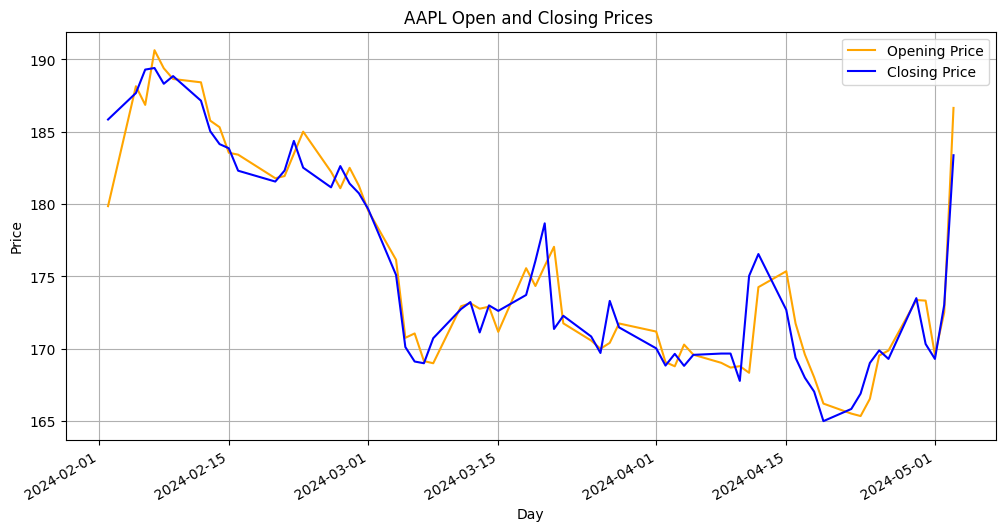

In [68]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data

plt.figure(figsize=(12,6))
plt.plot(last_three_months_apple['Date'], last_three_months_apple['Open'], label='Opening Price', color='orange')
plt.plot(last_three_months_apple['Date'], last_three_months_apple['Close/Last'], label='Closing Price', color='blue')
plt.title('AAPL Open and Closing Prices ') # add a title for this graph
plt.legend()
plt.xlabel("Day") # set a title for the x-axis
plt.ylabel("Price")
plt.grid()

# Set major locator for monthly ticks
#ax = plt.gca() # Get current axes
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# Set format to show year and month
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the labels for better visibility
plt.gcf().autofmt_xdate()

plt.show()


## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

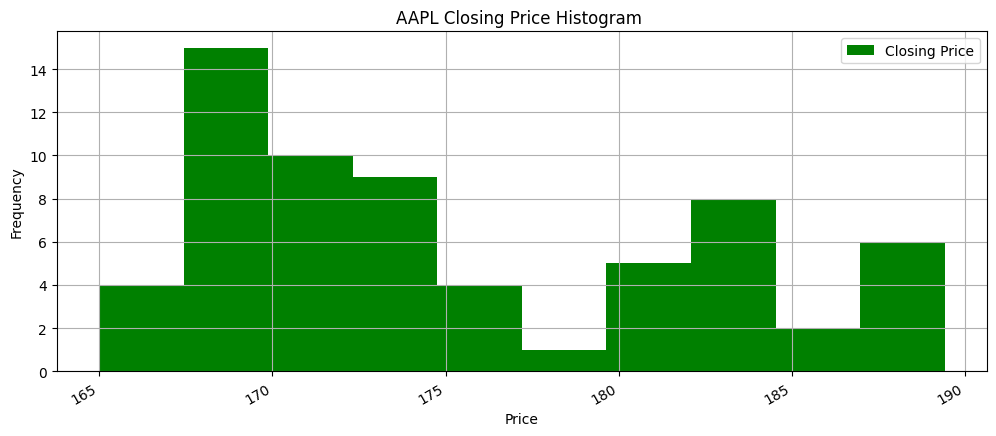

In [69]:
# Plot the histogram of Apple's closing price over the last 3 months 
plt.figure(figsize=(12,5))

#plt.bar(last_three_months_apple['Date'], last_three_months_apple['Close/Last'], label='Closing Price', color='green')
plt.hist(last_three_months_apple['Close/Last'], label='Closing Price', color='green')
plt.title('AAPL Closing Price Histogram ') # add a title for this graph
plt.legend()
plt.xlabel("Price") # set a title for the x-axis
plt.ylabel("Frequency")
plt.grid()

# Set major locator for monthly ticks
#ax = plt.gca() # Get current axes
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# Set format to show year and month
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the labels for better visibility
plt.gcf().autofmt_xdate()

plt.show()


## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [70]:
apple_data_sorted = apple_data.sort_index(inplace=True)
apple_data

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23
2014-05-07,21.15,282128727,21.26,21.33,20.99
2014-05-08,21.00,228973884,21.01,21.23,20.94
2014-05-09,20.91,291068564,20.88,20.94,20.73
2014-05-12,21.17,212736019,20.98,21.20,20.98
...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-05-01,169.30,50383150,169.58,172.71,169.11


In [71]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
apple_data['1_d_returns'] = apple_data['Close/Last'].pct_change(1)
apple_data


,Close/Last,Volume,Open,High,Low,1_d_returns
Date,,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23,NaN
2014-05-07,21.15,282128727,21.26,21.33,20.99,-0.003768
2014-05-08,21.00,228973884,21.01,21.23,20.94,-0.007092
2014-05-09,20.91,291068564,20.88,20.94,20.73,-0.004286
2014-05-12,21.17,212736019,20.98,21.20,20.98,0.012434
...,...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10,0.024808
2024-04-30,170.33,65934780,173.33,174.99,170.00,-0.018271
2024-05-01,169.30,50383150,169.58,172.71,169.11,-0.006047


In [72]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [73]:
msft_data.set_index('Date', inplace=True)

In [74]:
msft_data_sorted = msft_data.sort_index(inplace=True)
msft_data_sorted

In [75]:
msft_data

,Close/Last,Volume,Open,High,Low
Date,,,,,
2014-05-06,39.060,27105700,39.29,39.3500,38.9500
2014-05-07,39.425,41731030,39.22,39.5100,38.5100
2014-05-08,39.640,32089010,39.34,39.9000,38.9700
2014-05-09,39.540,29646100,39.54,39.8500,39.3700
2014-05-12,39.970,22761620,39.74,40.0200,39.6500
...,...,...,...,...,...
2024-04-29,402.250,19582090,405.25,406.3200,399.1900
2024-04-30,389.330,28781370,401.49,402.1600,389.1700
2024-05-01,394.940,23562480,392.61,401.7199,390.3100


In [76]:
msft_data['1_d_returns'] = msft_data['Close/Last'].pct_change(1)
msft_data

,Close/Last,Volume,Open,High,Low,1_d_returns
Date,,,,,,
2014-05-06,39.060,27105700,39.29,39.3500,38.9500,NaN
2014-05-07,39.425,41731030,39.22,39.5100,38.5100,0.009345
2014-05-08,39.640,32089010,39.34,39.9000,38.9700,0.005453
2014-05-09,39.540,29646100,39.54,39.8500,39.3700,-0.002523
2014-05-12,39.970,22761620,39.74,40.0200,39.6500,0.010875
...,...,...,...,...,...,...
2024-04-29,402.250,19582090,405.25,406.3200,399.1900,-0.010017
2024-04-30,389.330,28781370,401.49,402.1600,389.1700,-0.032119
2024-05-01,394.940,23562480,392.61,401.7199,390.3100,0.014409


In [77]:
inflation_data.reset_index(inplace=True)


In [78]:
inflation_data.rename(columns={'DATE': 'Date'}, inplace=True)
inflation_data.head

<bound method NDFrame.head of           Date  CORESTICKM159SFRBATL
0   1968-01-31              3.651861
1   1968-02-29              3.673819
2   1968-03-31              4.142164
3   1968-04-30              4.155828
4   1968-05-31              4.088245
..         ...                   ...
670 2023-11-30              4.688293
671 2023-12-31              4.554396
672 2024-01-31              4.603922
673 2024-02-29              4.403102
674 2024-03-31              4.509212

[675 rows x 2 columns]>

In [79]:
inflation_data.head()

,Date,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


In [80]:
inflation_data.set_index('Date', inplace=True)
inflation_data.head()

,CORESTICKM159SFRBATL
Date,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245


In [81]:
inflation_data['pct_change'] = inflation_data['CORESTICKM159SFRBATL'].pct_change(1)

In [82]:
inflation_data

,CORESTICKM159SFRBATL,pct_change
Date,,
1968-01-31,3.651861,NaN
1968-02-29,3.673819,0.006013
1968-03-31,4.142164,0.127482
1968-04-30,4.155828,0.003299
1968-05-31,4.088245,-0.016262
...,...,...
2023-11-30,4.688293,-0.039860
2023-12-31,4.554396,-0.028560
2024-01-31,4.603922,0.010874


### 2. Interpolate stock returns from daily to monthly

In [83]:
import numpy as np

In [84]:
# Resample to monthly frequency and calculate compounded returns
def calculate_compounded_return(returns):                        
    return np.prod(1 + returns) - 1


In [85]:
#resample

apple_returns_data = apple_data['1_d_returns'].resample('ME').apply(calculate_compounded_return)

In [86]:
apple_returns_data.head()

Date
2014-05-31    0.065002
2014-06-30    0.027421
2014-07-31    0.028842
2014-08-31    0.072385
2014-09-30   -0.017167
Freq: ME, Name: 1_d_returns, dtype: float64

In [87]:
msft_data.head()

,Close/Last,Volume,Open,High,Low,1_d_returns
Date,,,,,,
2014-05-06,39.060,27105700,39.29,39.35,38.95,NaN
2014-05-07,39.425,41731030,39.22,39.51,38.51,0.009345
2014-05-08,39.640,32089010,39.34,39.90,38.97,0.005453
2014-05-09,39.540,29646100,39.54,39.85,39.37,-0.002523
2014-05-12,39.970,22761620,39.74,40.02,39.65,0.010875


In [88]:
#msft_data.set_index('Date', inplace=True)

In [89]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-05-06 to 2024-05-03
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close/Last   2517 non-null   float64
 1   Volume       2517 non-null   int64  
 2   Open         2517 non-null   float64
 3   High         2517 non-null   float64
 4   Low          2517 non-null   float64
 5   1_d_returns  2516 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [90]:
msft_returns_data = msft_data['1_d_returns'].resample('ME').apply(calculate_compounded_return)
msft_returns_data.head()

Date
2014-05-31    0.048131
2014-06-30    0.018564
2014-07-31    0.035012
2014-08-31    0.052595
2014-09-30    0.020471
Freq: ME, Name: 1_d_returns, dtype: float64

### 3. Merge the dataframes and calculate / plot the correlation

In [91]:
merged_data = pd.merge(apple_returns_data, msft_returns_data, left_index=True, right_index=True,how='outer')

In [92]:
merged_data.head()

,1_d_returns_x,1_d_returns_y
Date,,
2014-05-31,0.065002,0.048131
2014-06-30,0.027421,0.018564
2014-07-31,0.028842,0.035012
2014-08-31,0.072385,0.052595
2014-09-30,-0.017167,0.020471


In [93]:
merged_data = pd.merge(merged_data, inflation_data['pct_change'], left_index=True, right_index=True, how='outer')

In [94]:
merged_data

,1_d_returns_x,1_d_returns_y,pct_change
Date,,,
1968-01-31,NaN,NaN,NaN
1968-02-29,NaN,NaN,0.006013
1968-03-31,NaN,NaN,0.127482
1968-04-30,NaN,NaN,0.003299
1968-05-31,NaN,NaN,-0.016262
...,...,...,...
2024-01-31,-0.042227,0.057281,0.010874
2024-02-29,-0.019794,0.040394,-0.043619
2024-03-31,-0.051286,0.017116,0.024099


In [95]:
merged_data.columns = ['1_m_returns_AAPL', '1_m_returns_MSFT', 'inflation_change']
merged_data.head()

,1_m_returns_AAPL,1_m_returns_MSFT,inflation_change
Date,,,
1968-01-31,NaN,NaN,NaN
1968-02-29,NaN,NaN,0.006013
1968-03-31,NaN,NaN,0.127482
1968-04-30,NaN,NaN,0.003299
1968-05-31,NaN,NaN,-0.016262


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [96]:
# Calculate correlation matrix
correlation_matrix = merged_data.corr()
correlation_matrix

,1_m_returns_AAPL,1_m_returns_MSFT,inflation_change
1_m_returns_AAPL,1.000000,0.587122,-0.074699
1_m_returns_MSFT,0.587122,1.000000,-0.070176
inflation_change,-0.074699,-0.070176,1.000000


### 5. Plot the correlation matrix as a heatmap 

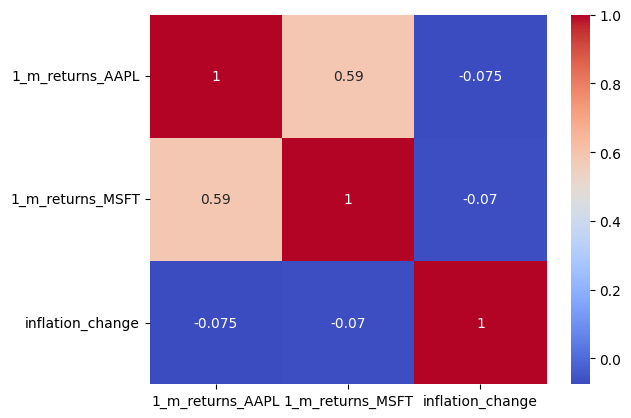

In [97]:
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.show()

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [98]:
# Define the window size for the rolling calculation (e.g., one week)
window_size = 5

In [99]:
apple_data

,Close/Last,Volume,Open,High,Low,1_d_returns
Date,,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23,NaN
2014-05-07,21.15,282128727,21.26,21.33,20.99,-0.003768
2014-05-08,21.00,228973884,21.01,21.23,20.94,-0.007092
2014-05-09,20.91,291068564,20.88,20.94,20.73,-0.004286
2014-05-12,21.17,212736019,20.98,21.20,20.98,0.012434
...,...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10,0.024808
2024-04-30,170.33,65934780,173.33,174.99,170.00,-0.018271
2024-05-01,169.30,50383150,169.58,172.71,169.11,-0.006047


In [100]:
# Calculate rolling one-week volatility
apple_data['volatility'] = apple_data['1_d_returns'].rolling(window=window_size).std()
apple_data.head(10)

,Close/Last,Volume,Open,High,Low,1_d_returns,volatility
Date,,,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23,NaN,NaN
2014-05-07,21.15,282128727,21.26,21.33,20.99,-0.003768,NaN
2014-05-08,21.00,228973884,21.01,21.23,20.94,-0.007092,NaN
2014-05-09,20.91,291068564,20.88,20.94,20.73,-0.004286,NaN
2014-05-12,21.17,212736019,20.98,21.20,20.98,0.012434,NaN
2014-05-13,21.21,159417936,21.14,21.23,21.10,0.001889,0.007761
2014-05-14,21.21,166020698,21.16,21.34,21.13,0.000000,0.007502
2014-05-15,21.03,229710816,21.24,21.31,21.00,-0.008487,0.007875
2014-05-16,21.34,275840350,21.02,21.34,20.91,0.014741,0.009524


In [101]:
#get last 3 months only
last_index = apple_data.index[-1]
last_index

Timestamp('2024-05-03 00:00:00')

In [102]:
three_months_ago = last_index - relativedelta(months=3) - relativedelta(days=1)
three_months_ago

Timestamp('2024-02-02 00:00:00')

In [103]:
last_3_months_apple = apple_data[three_months_ago:]
last_3_months_apple

,Close/Last,Volume,Open,High,Low,1_d_returns,volatility
Date,,,,,,,
2024-02-02,185.85,102551700,179.86,187.33,179.25,-0.005405,0.013822
2024-02-05,187.68,69668820,188.15,189.25,185.84,0.009847,0.015513
2024-02-06,189.30,43490760,186.86,189.31,186.77,0.008632,0.013633
2024-02-07,189.41,53438960,190.64,191.05,188.61,0.000581,0.007636
2024-02-08,188.32,40962050,189.39,189.54,187.35,-0.005755,0.007444
...,...,...,...,...,...,...,...
2024-04-29,173.50,68169420,173.37,176.03,173.10,0.024808,0.010497
2024-04-30,170.33,65934780,173.33,174.99,170.00,-0.018271,0.016292
2024-05-01,169.30,50383150,169.58,172.71,169.11,-0.006047,0.015996


In [104]:
last_3_months_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2024-02-02 to 2024-05-03
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close/Last   64 non-null     float64
 1   Volume       64 non-null     int64  
 2   Open         64 non-null     float64
 3   High         64 non-null     float64
 4   Low          64 non-null     float64
 5   1_d_returns  64 non-null     float64
 6   volatility   64 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.0 KB


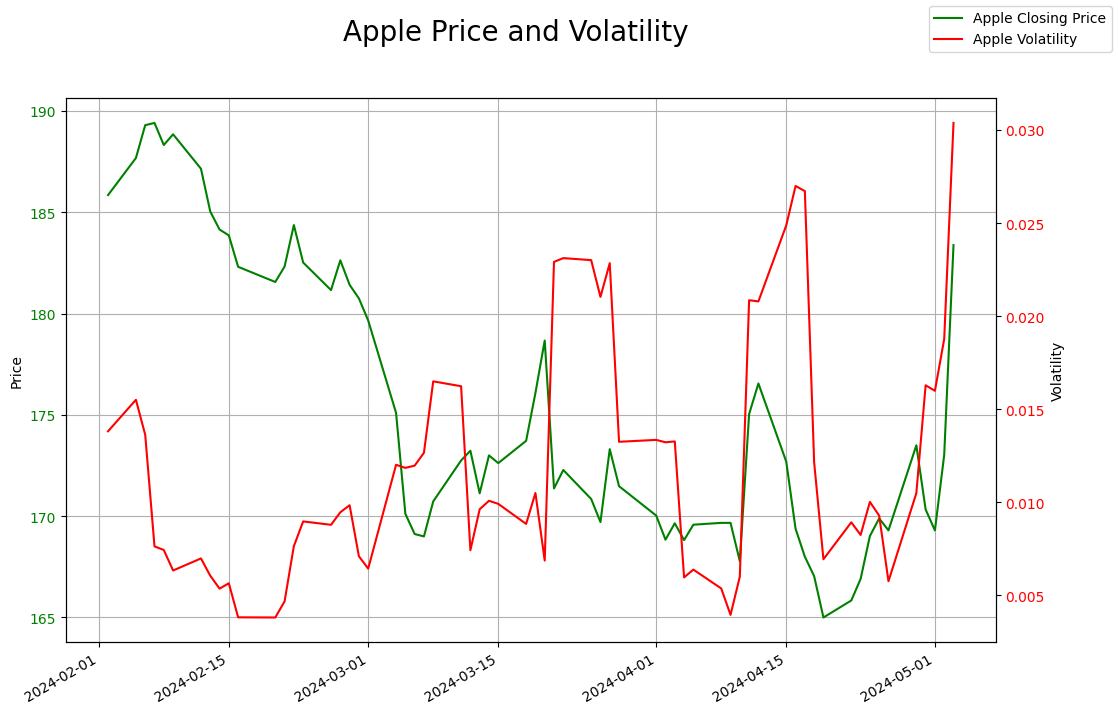

In [105]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
# create a figure with two axes
COLOR_VOL = "#FF0000"
COLOR_PRICE = "#097969"
fig, ax1 = plt.subplots(figsize=(12,8)) # this is the foundation of creating multiple charts on one figure
ax2 = ax1.twinx()

# ax[0] creates the first chart. You'll want to add all 3 line plots to it: 

ax1.plot(last_3_months_apple.index, last_3_months_apple['Close/Last'], label='Apple Closing Price', color='green')
ax1.set_ylabel('Price')
#ax1.set_title('AAPL Closing Price ') # add a title for this graph
#ax1.legend()
ax1.grid()
ax1.tick_params(axis="y", labelcolor='green')

# ax[1] creates the second, separate chart on the same figure
ax2.plot(last_3_months_apple.index, last_3_months_apple['volatility'], label='Apple Volatility', color='Red') 
ax2.set_xlabel("Day") # set a title for the x-axis
ax2.set_ylabel("Volatility") # set a title for the y-axis 
#ax2.set_title('Apple Rolling Volatility')
#ax2.legend()

ax2.tick_params(axis="y", labelcolor='red')

fig.legend(loc="upper right")
fig.autofmt_xdate()
fig.suptitle("Apple Price and Volatility", fontsize=20)
plt.show()





## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [106]:
last_3_months_apple.to_csv('last_three_months_apple.csv',  header=True, index=False)

In [107]:
apple_data.to_csv('apple_data.csv',  header=True, index=True)

In [108]:
msft_data.to_csv('msft_data.csv',  header=True, index=True)

In [109]:
correlation_matrix.to_csv('correlation_matrix.csv',  header=True, index=True)

In [110]:
inflation_data.to_csv('inflation_data.csv',  header=True, index=True)

In [111]:
inflation_weekly.to_csv('inflation_weekly.csv',  header=True, index=True)

In [112]:
inflation_quarterly.to_csv('inflation_quarterly.csv',  header=True, index=True)

In [113]:
norm_gdp_data.to_csv('norm_gdp_data.csv',  header=True, index=False)

In [114]:
norm_gdp_data_via_scaler.to_csv('norm_gdp_data_via_scaler.csv',  header=True, index=False)

In [115]:
merged_data.to_csv('merged_data.csv',  header=True, index=True)